In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math

In [2]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats

,Unnamed: 0,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
0,0,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
1,1,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
2,2,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
3,3,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
4,4,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,6,29,25.0,49.2,14,8,11,25,8,34,0.0,50.8,9,10,15,29,3
9497,9497,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
9498,9498,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
9499,9499,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7


### Partition Training & Testing Data

In [3]:
features = np.array(game_stats.loc[:, game_stats.columns != 'totalGoals'],  dtype='float32')
targets = np.array(game_stats['totalGoals'], dtype='float32')

x_train = features[:int(features.shape[0] * 0.8)]
t_train = targets[:int(targets.shape[0] * 0.8)]

x_test = features[int(features.shape[0] * 0.8):]
t_test = targets[int(targets.shape[0] * 0.8):]

### Define Closed Form Linear Regression

In [4]:
def cf_lin_reg(X : np.array, t : np.array) -> np.array:
    '''
    cf_lin_reg:
        - Closed form solution for linear regression

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        
    Returns:
        - w_hat: numpy array of optimal weights w/ shape (M, 1)
    '''
    X_trans = X.transpose()
    w_hat = inv(X_trans.dot(X)).dot(X_trans).dot(t)
    return w_hat

### Compute optimal weights for training data

In [5]:
w_hat = cf_lin_reg(x_train, t_train)
w_hat

array([ 1.6782898e-05,  1.0643307e-02,  4.0208075e-02,  1.9682080e-02,
        2.4549533e-02, -1.9588636e-02,  4.8052976e-03,  6.3254358e-03,
       -7.3347529e-03,  1.6940679e-02,  4.4252962e-02,  1.8843526e-02,
        2.5812831e-02, -2.5331629e-02,  1.8050877e-02,  7.6635084e-03,
       -7.7737514e-03], dtype=float32)

### Define Prediction

In [6]:
def predict(X : np.array, w : np.array) -> np.array:
    '''
    predict:
        - Predicts targets using given weights

    Params:
        - X: numpy array of features w/ shape (d, M)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - t_hat: numpy array of predicted targets w/ shape (d, 1)
    '''
    t_hat = X.dot(w)
    return t_hat

### Make predictions (t_hat), plot both predictions and true targets

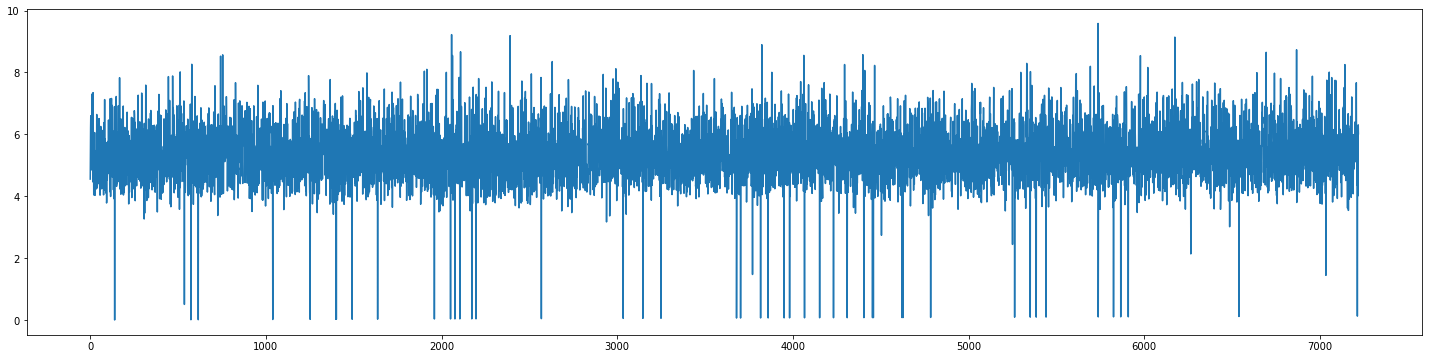

In [26]:
t_hat = predict(x_train, w_hat)
plt.rcParams["figure.figsize"] = (25, 6)
plt.plot(t_hat)

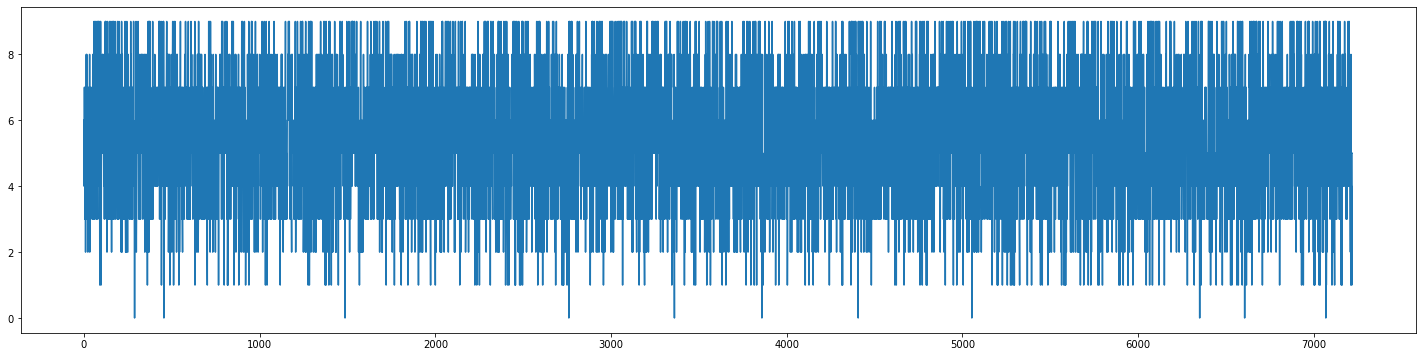

In [27]:
plt.plot(t_train)

### Plot prediction and true target distributions

array([[<AxesSubplot:title={'center':'predictions'}>,
        <AxesSubplot:title={'center':'targets'}>]], dtype=object)

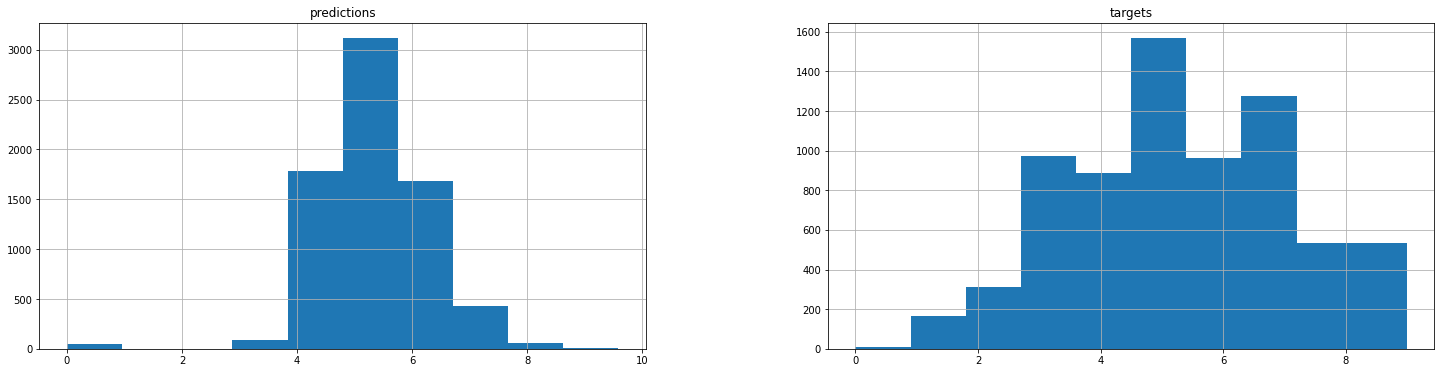

In [28]:
pred_and_targets_df = pd.DataFrame({'predictions': t_hat, 'targets': t_train})
pred_and_targets_df.hist()

### Analyze 'Training' Loss of Closed Form Solution

In [29]:
def avg_loss(X : np.array, t : np.array, w : np.array) -> float:
    '''
    avg_loss:
        - Average loss of predictions

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - avg_loss: float
    '''
    t_hat = predict(X, w)
    losses = [(pred - target) ** 2 for pred, target in zip(t_hat, t)]
    avg_loss = np.sum(losses) / len(losses)
    
    return losses, avg_loss

In [30]:
losses, average_loss = avg_loss(x_train, t_train, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: 3.5008007113289397
Min loss: 1.7209913494298235e-09
Max loss: 80.55563051370336

------- Absolute Error -------
Average loss: 1.871042680253163
Min loss: 4.1484832763671875e-05
Max loss: 8.975278854370117


### Absolute Loss Distribution of 'Training' loss

<AxesSubplot:>

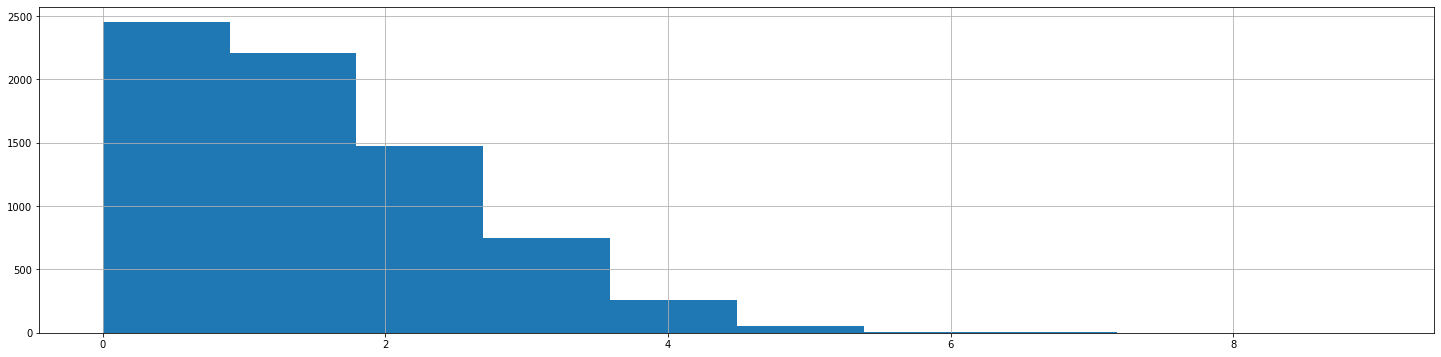

In [31]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
losses_df["loss"].hist()

### Explore Performance on Unseen Data

In [32]:
losses, average_loss = avg_loss(x_test, t_test, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: 3.3236005530295856
Min loss: 2.1095993361086585e-06
Max loss: 78.34320304334688

------- Absolute Error -------
Average loss: 1.823074478190506
Min loss: 0.0014524459838867188
Max loss: 8.85116958618164


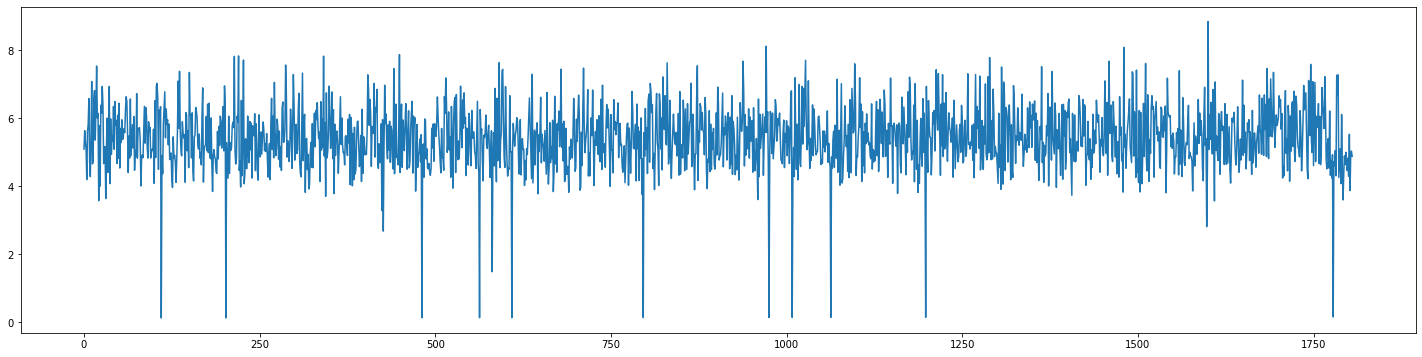

In [33]:
t_hat = predict(x_test, w_hat)
plt.plot(t_hat)

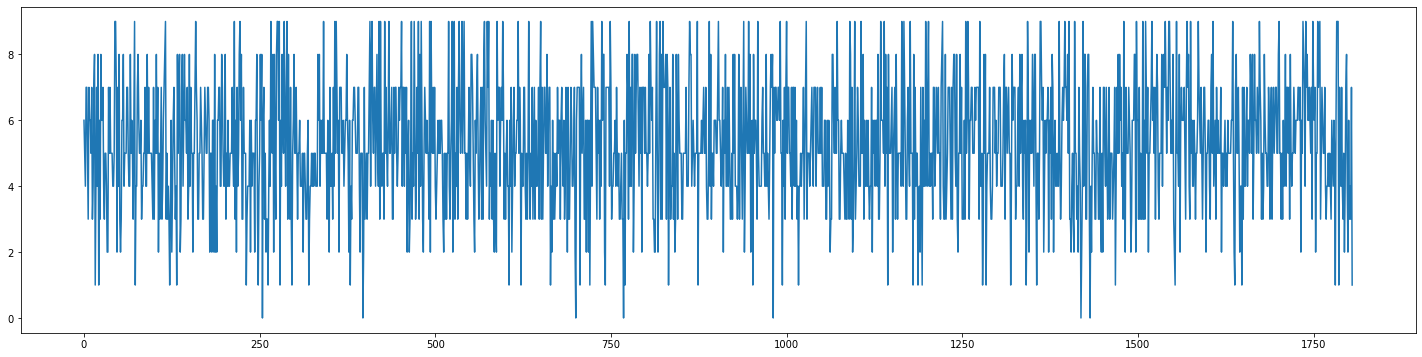

In [34]:
plt.plot(t_test)

array([[<AxesSubplot:title={'center':'predictions'}>,
        <AxesSubplot:title={'center':'targets'}>]], dtype=object)

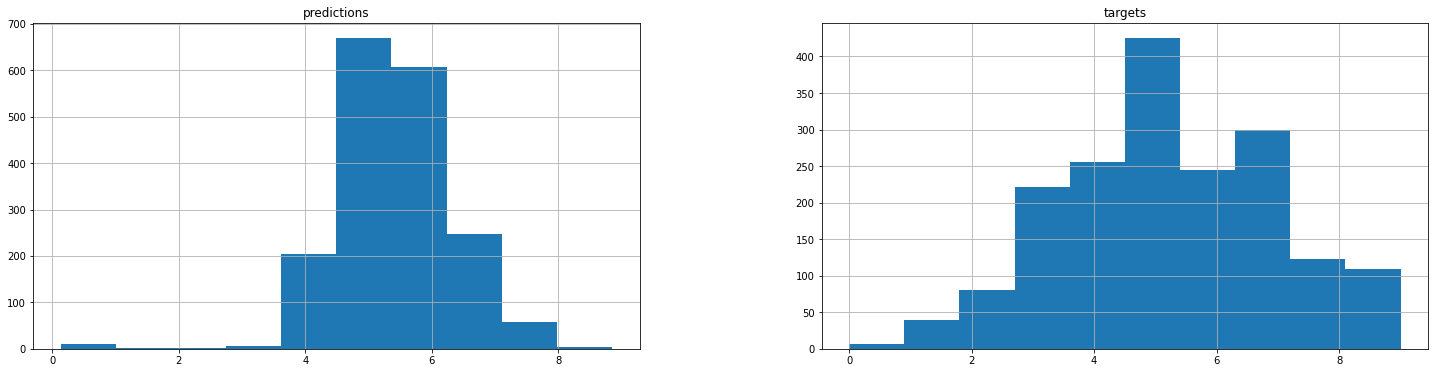

In [35]:
pred_and_targets_df = pd.DataFrame({'predictions': t_hat, 'targets': t_test})
pred_and_targets_df.hist()

<AxesSubplot:>

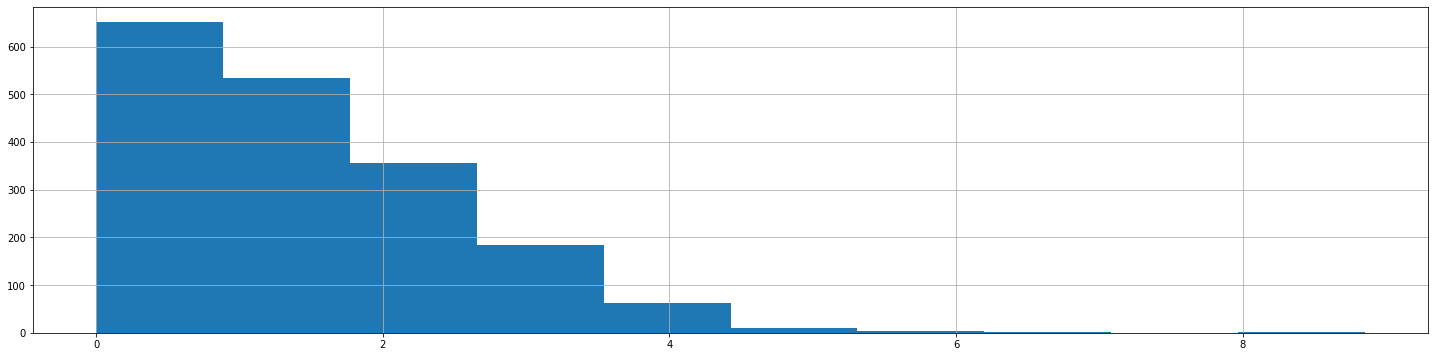

In [36]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
losses_df["loss"].hist()